In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy import stats
from operator import sub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('../data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0


In [3]:
numerical_features = ['release_date', 'duration', 'popularity', 'danceability', 
                    'acousticness', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
                    'speechiness', 'tempo', 'time_signature', 'valence']
categorical_features = ['name', 'artist']

In [4]:
for x in numerical_features:
    q75,q25 = np.percentile(dataset.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dataset.loc[dataset[x] < min,x] = np.nan
    dataset.loc[dataset[x] > max,x] = np.nan

In [5]:
dataset = dataset.dropna(axis = 0)

In [6]:
dataset = dataset.apply(LabelEncoder().fit_transform).drop(['hit'], axis=1)
dataset.head(3)

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,658,35,314,67,295,42,581,738,1,498,2151,328,1176,0,598
Bohemian Rhapsody - Remastered 2011,736,19,397,67,185,1535,92,0,0,634,612,300,2317,0,129
(I Can't Get No) Satisfaction - Mono Version,1067,9,182,70,516,1037,532,1556,2,520,1087,102,2079,0,806


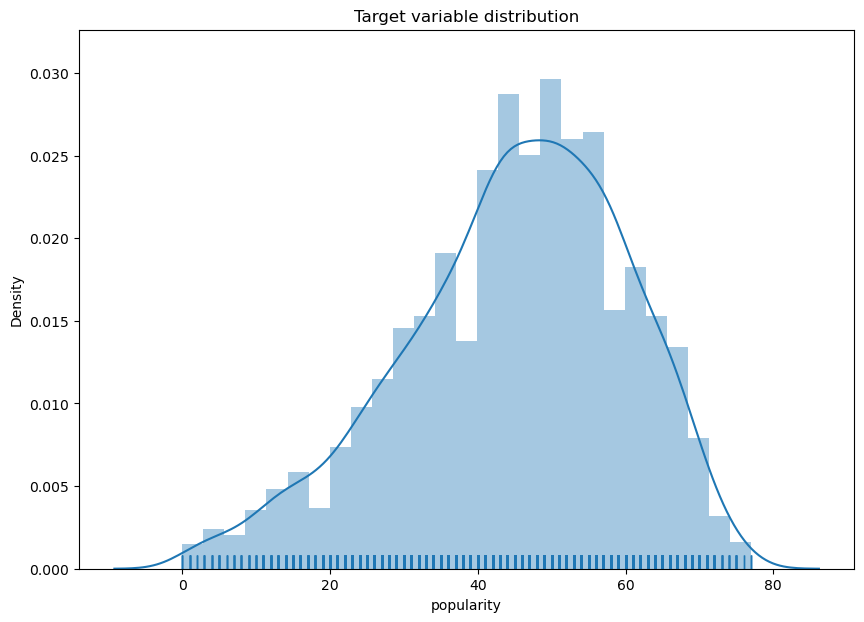

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(dataset['popularity'], kde=True, rug=True)
plt.title('Target variable distribution')
plt.show()

In [8]:
X = dataset.drop(['popularity'], axis = 1)
Y = dataset['popularity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_columns = X.columns

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X = scaler.transform(X)

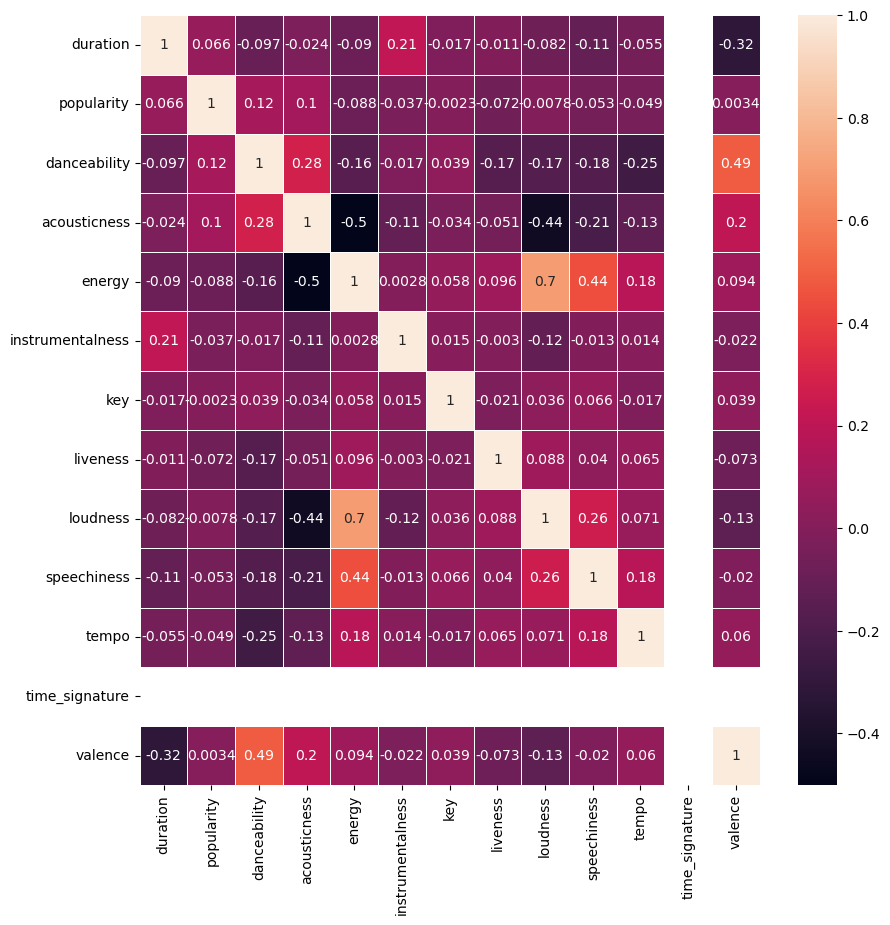

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[dataset.columns.drop(['artist', 'release_date'])].corr(), annot=True, linewidth = .5)
plt.show()

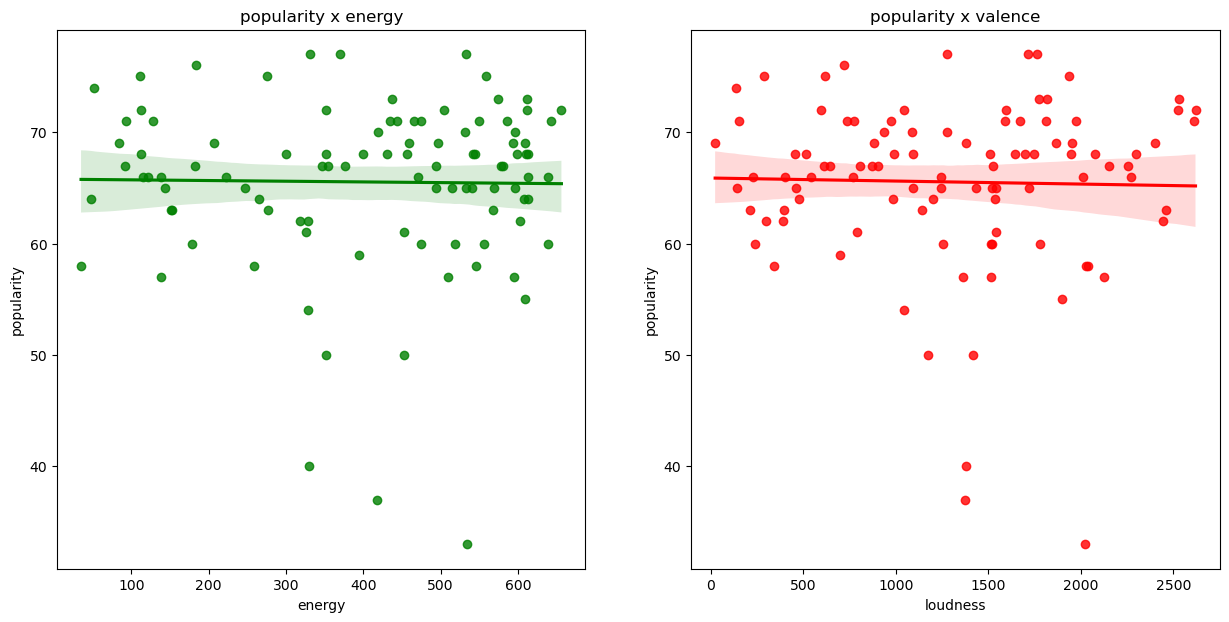

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.regplot(data=dataset.head(100), x='energy', y='popularity', ax=plt.gca(), color='green')
plt.title('popularity x energy')
plt.subplot(1,2,2)
sns.regplot(data=dataset.head(100), x='loudness', y='popularity', ax=plt.gca(), color='red')
plt.title('popularity x valence')
plt.show()

&nbsp;

## Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
coeff_lr = pd.DataFrame(lr.coef_, X_columns, columns=['Coefficient'])
coeff_lr

,Coefficient
artist,-0.221198
release_date,-3.736568
duration,1.396290
danceability,2.121395
acousticness,0.244381
energy,-2.058832
instrumentalness,-0.763076
key,0.124662
liveness,-0.642752
loudness,3.445005


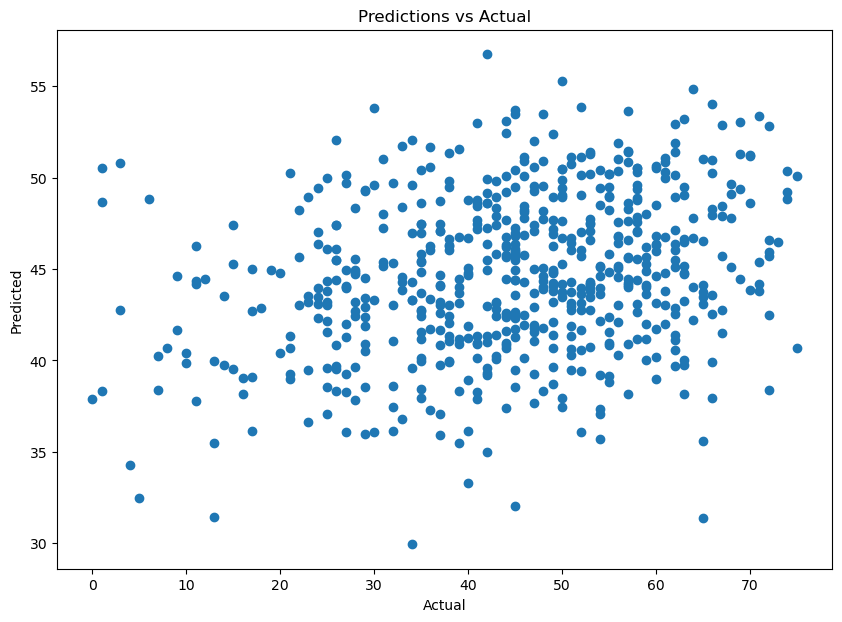

In [16]:
predictions = lr.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

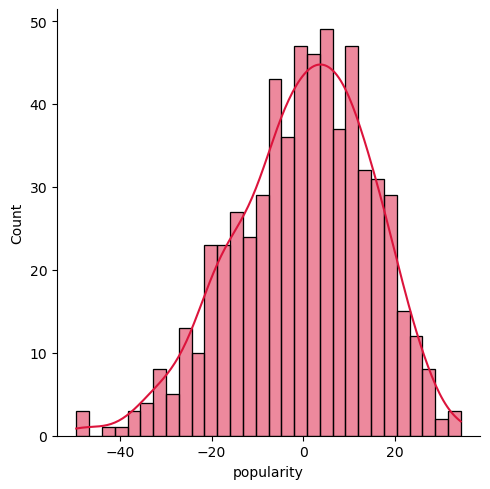

In [17]:
sns.displot((y_test - predictions), bins=30, kde=True, color='crimson')
plt.show()

In [18]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, predictions)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, predictions)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

Mean Absolute Error(MAE): 11.833633690615274

Mean Squared Error(MSE): 216.9147201934716

Root Mean Square Error(RMSE): 14.728024992967374


In [19]:
x = dataset[X_columns]
y = dataset['popularity']

In [20]:
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              1868.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):                        0.00
Time:                        01:36:09   Log-Likelihood:                         -12750.
No. Observations:                3051   AIC:                                  2.553e+04
Df Residuals:                    3038   BIC:                                  2.561e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

&nbsp;

## Polynomial basis functions

In [21]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [22]:
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size = 0.2)

In [23]:
lr.fit(X_train_poly, Y_train_poly)
coeff_lr = pd.DataFrame(lr.coef_, columns=['Coefficient'])
coeff_lr

,Coefficient
0,-2.374447e+08
1,-1.837584e-01
2,-3.835065e+00
3,1.031806e+00
4,2.471487e+00
...,...
115,0.000000e+00
116,-4.414876e-01
117,0.000000e+00
118,0.000000e+00


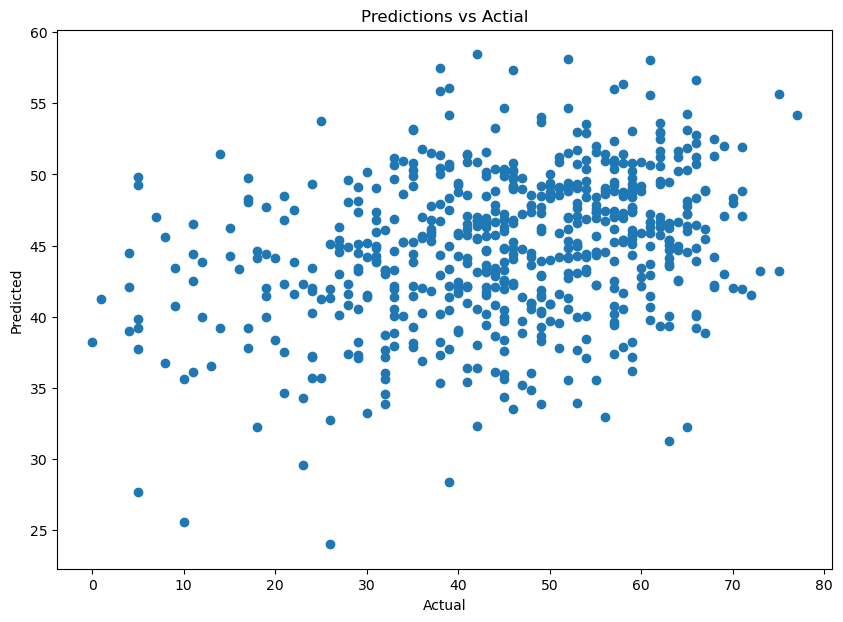

In [24]:
y_pred = lr.predict(X_test_poly)
plt.figure(figsize=(10,7))
plt.scatter(Y_test_poly, y_pred)
plt.title('Predictions vs Actial')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

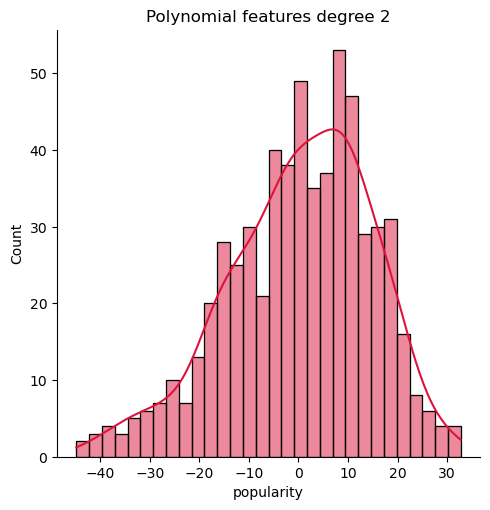

In [25]:
sns.displot((Y_test_poly - y_pred), bins=30, kde=True, color='crimson')
plt.title('Polynomial features degree 2')
plt.show()

In [26]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(Y_test_poly, y_pred)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(Y_test_poly, y_pred)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(Y_test_poly, y_pred))}')

Mean Absolute Error(MAE): 11.657755693759153

Mean Squared Error(MSE): 210.4489405624487

Root Mean Square Error(RMSE): 14.50685839740806


&nbsp;

## Lasso regression (L1 Regularization)

In [27]:
lasso = Lasso(alpha=0.05, random_state=0, max_iter=10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, max_iter=10000, random_state=0)

In [28]:
coeff_lasso = pd.DataFrame(lasso.coef_, X_columns, columns=['Coefficient'])
coeff_lasso

,Coefficient
artist,-0.185539
release_date,-3.614748
duration,1.342252
danceability,2.012544
acousticness,0.217365
energy,-1.946995
instrumentalness,-0.718873
key,0.065522
liveness,-0.604966
loudness,3.244496


In [29]:
lasso_predicted = lasso.predict(X_test)

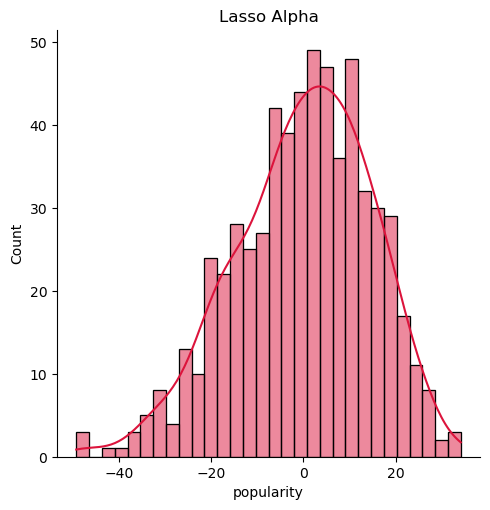

In [30]:
sns.displot((y_test - lasso_predicted), bins=30, kde=True, color='crimson')
plt.title('Lasso Alpha')
plt.show()

In [31]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, lasso_predicted)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, lasso_predicted)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, lasso_predicted))}')

Mean Absolute Error(MAE): 11.830223337144528

Mean Squared Error(MSE): 216.76849621417975

Root Mean Square Error(RMSE): 14.723060015301838


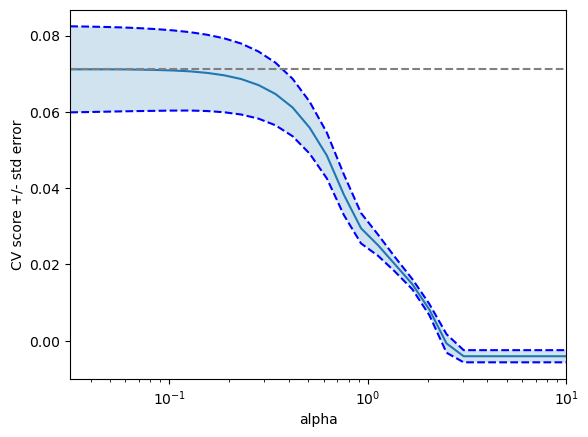

In [32]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-1.5, 1, 30)

parameters = [{'alpha': alphas}]
n_folds = 5

model = GridSearchCV(lasso, parameters, cv=n_folds, refit=False)
model.fit(X_train, y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

&nbsp;

## Ridge regression (L2 Regularization)

In [33]:
ridge = Ridge(alpha=62.2, random_state=0, max_iter=10000)
ridge.fit(X_train, y_train)

Ridge(alpha=62.2, max_iter=10000, random_state=0)

In [34]:
coeff_ridge = pd.DataFrame(ridge.coef_, X_columns, columns=['Coefficient'])
coeff_ridge

,Coefficient
artist,-0.227610
release_date,-3.536431
duration,1.339351
danceability,2.019006
acousticness,0.302985
energy,-1.830596
instrumentalness,-0.754473
key,0.115249
liveness,-0.643642
loudness,3.135346


In [35]:
ridge_predicted = ridge.predict(X_test)

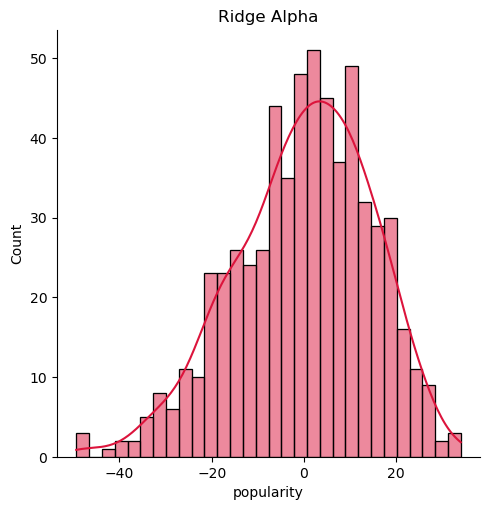

In [36]:
sns.displot((y_test - ridge_predicted), bins=30, kde=True, color='crimson')
plt.title('Ridge Alpha')
plt.show()

In [37]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, ridge_predicted)}')
print(f'\nMean Squared Error(MSE): {metrics.mean_squared_error(y_test, ridge_predicted)}')
print(f'\nRoot Mean Square Error(RMSE): {np.sqrt(metrics.mean_squared_error(y_test, ridge_predicted))}')

Mean Absolute Error(MAE): 11.82729470244437

Mean Squared Error(MSE): 216.9201214041562

Root Mean Square Error(RMSE): 14.72820835689651


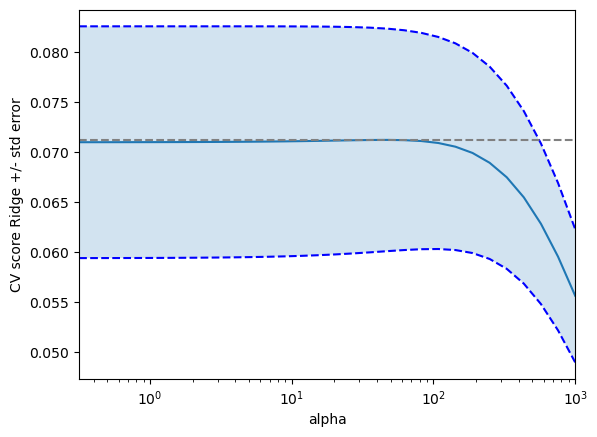

In [38]:
ridge = Ridge(random_state=0, max_iter=10000)
alphas = np.logspace(-0.5, 3, 30)

tuned_parameters = [{'alpha': alphas}]

model = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False)
model.fit(X_train, y_train)
scores = model.cv_results_['mean_test_score']
scores_std = model.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score Ridge +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()